In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

## Dataset
** Data preparation was done manually **

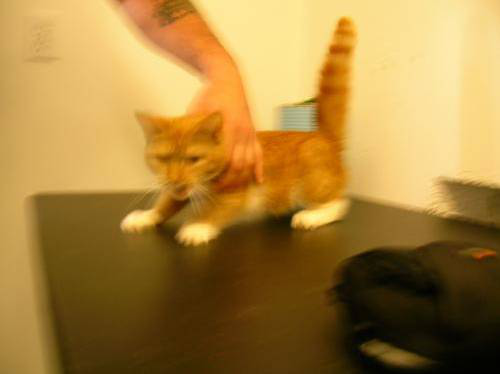

In [2]:
path_train = './train/'
path_val = './validation/'
name = 'cats/cat.0.jpg'
fullname = f'{path_train}/{name}'
load_img(fullname)

## Model


For this homework we will use Convolutional Neural Network (CNN. Like in the lectures, we'll use Keras.

You need to develop the model with following structure:

The shape for input should be (150, 150, 3)

Next, create a covolutional layer (Conv2D):

    Use 32 filters

    Kernel size should be (3, 3) (that's the size of the filter)

    Use 'relu' as activation

Reduce the size of the feature map with max pooling (MaxPooling2D) (reduce the dimensions of matrix using max values from 4x4 to 2x2)

    Set the pooling size to (2, 2)

Turn the multi-dimensional result into vectors using a Flatten layer (transform a 3d object into a vector)

Next, add a Dense layer with 64 neurons and 'relu' activation (from here was covered in the lectures)

Finally, create the Dense layer with 1 neuron - this will be the output

    The output layer should have an activation - use the appropriate activation for the binary classification 

As optimizer use SGD with the following parameters:

    SGD(lr=0.002, momentum=0.8)

In [3]:
inputs = keras.layers.Input(shape=(150, 150, 3))
cov_layer = tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation= "relu")(inputs)
max_pooling = tf.keras.layers.MaxPooling2D(pool_size=(2, 2)) (cov_layer)
flatten_layer = tf.keras.layers.Flatten() (max_pooling)
inner_dense = keras.layers.Dense(64, activation = "relu")(flatten_layer)
outputs = keras.layers.Dense(1, activation= "sigmoid")(inner_dense)
model = keras.Model(inputs, outputs)
optimizer = keras.optimizers.SGD(lr = 0.002, momentum = 0.8)
loss = keras.losses.BinaryCrossentropy(from_logits=False)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

## Question 1
Since we have a binary classification problem, what is the best loss function for us?
BinaryCrossentropy

## Question 2
What's the total number of parameters of the model? You can use the summary method for that.

In [4]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 175232)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                11214912  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
__________________________________________

## Question 3
What is the median of training accuracy for this model?

## Question 4
What is the standard deviation of training loss for this model?

In [5]:
train_gen = ImageDataGenerator(rescale=1./255)

train_ds = train_gen.flow_from_directory(
    path_train,
    target_size=(150, 150),
    class_mode='binary',
    batch_size=20
)


val_gen = ImageDataGenerator(rescale=1./255)

val_ds = val_gen.flow_from_directory(
    path_val,
    target_size=(150, 150),
    class_mode='binary',
    batch_size=20
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [6]:
history = model.fit(
    train_ds,
    steps_per_epoch=100,
    epochs=10,
    validation_data=val_ds,
    validation_steps=50
)

Epoch 1/10
100/100 [==============================] - 20s 202ms/step - loss: 0.6990 - accuracy: 0.5060 - val_loss: 0.6932 - val_accuracy: 0.4950
Epoch 2/10
100/100 [==============================] - 19s 192ms/step - loss: 0.6923 - accuracy: 0.5095 - val_loss: 0.6914 - val_accuracy: 0.5240
Epoch 3/10
100/100 [==============================] - 18s 179ms/step - loss: 0.6926 - accuracy: 0.5200 - val_loss: 0.6925 - val_accuracy: 0.4960
Epoch 4/10
100/100 [==============================] - 18s 176ms/step - loss: 0.6910 - accuracy: 0.5200 - val_loss: 0.6879 - val_accuracy: 0.5520
Epoch 5/10
100/100 [==============================] - 18s 175ms/step - loss: 0.6890 - accuracy: 0.5545 - val_loss: 0.6866 - val_accuracy: 0.5610
Epoch 6/10
100/100 [==============================] - 18s 175ms/step - loss: 0.6884 - accuracy: 0.5340 - val_loss: 0.6838 - val_accuracy: 0.5670
Epoch 7/10
100/100 [==============================] - 17s 173ms/step - loss: 0.6824 - accuracy: 0.5630 - val_loss: 0.6770 - val_ac

In [7]:
hist = history.history
print('Median:', round(np.median(hist["accuracy"]),2))

Median: 0.54


In [8]:
print('STD:', round(np.std(hist["loss"]),3))

STD: 0.011


## Question 5
Let's train our model for 10 more epochs using the same code as previously. Make sure you don't re-create the model - we want to continue training the model we already started training.

What is the mean of validation loss for the model trained with augmentations?

## Question 6
What's the average of validation accuracy for the last 5 epochs (from 6 to 10) for the model trained with augmentations?

In [9]:
train_gen_augmented = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_ds_augmented  = train_gen_augmented.flow_from_directory(
    path_train,
    target_size=(150, 150),
    class_mode='binary',
    batch_size=20
)

Found 20000 images belonging to 2 classes.


In [10]:
history_augmented = model.fit(
    train_ds_augmented,
    steps_per_epoch=100,
    epochs=10,
    validation_data=val_ds,
    validation_steps=50
)

Epoch 1/10
100/100 [==============================] - 24s 239ms/step - loss: 0.6831 - accuracy: 0.5405 - val_loss: 0.6593 - val_accuracy: 0.6390
Epoch 2/10
100/100 [==============================] - 25s 253ms/step - loss: 0.6819 - accuracy: 0.5560 - val_loss: 0.6596 - val_accuracy: 0.6110
Epoch 3/10
100/100 [==============================] - 24s 238ms/step - loss: 0.6832 - accuracy: 0.5420 - val_loss: 0.6716 - val_accuracy: 0.6200
Epoch 4/10
100/100 [==============================] - 24s 236ms/step - loss: 0.6776 - accuracy: 0.5665 - val_loss: 0.6728 - val_accuracy: 0.5780
Epoch 5/10
100/100 [==============================] - 23s 235ms/step - loss: 0.6770 - accuracy: 0.5760 - val_loss: 0.6656 - val_accuracy: 0.6100
Epoch 6/10
100/100 [==============================] - 25s 246ms/step - loss: 0.6729 - accuracy: 0.5735 - val_loss: 0.6499 - val_accuracy: 0.6110
Epoch 7/10
100/100 [==============================] - 24s 244ms/step - loss: 0.6676 - accuracy: 0.5945 - val_loss: 0.6790 - val_ac

In [11]:
hist_augmented = history_augmented.history
print('Mean augmented:', round(np.mean(hist_augmented["accuracy"][5:10]),2))

Mean augmented: 0.58


In [12]:
print('Average of validation accuracy for the last 5 epochs augmented:', round(np.mean(hist_augmented["val_accuracy"]),2))

Average of validation accuracy for the last 5 epochs augmented: 0.6
